## DATA SCIENCE QUESTION - 1
### Sales Conversion Optimization 

#### Aim:
To optimize sales conversion.

#### Data:
The data used in this project is from an anonymous organisation’s social media ad campaign.

- ad_id: an unique ID for each ad.
- xyz_campaign_id: an ID associated with each ad campaign of XYZ company.
- fbcampaignid: an ID associated with how Facebook tracks each campaign.
- age: age of the person to whom the ad is shown.
- gender: gender of the person to whim the add is shown
- interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).
- Impressions: the number of times the ad was shown.
- Clicks: number of clicks on for that ad.
- Spent: Amount paid by company xyz to Facebook, to show that ad.
- Total conversion: Total number of people who enquired about the product after seeing the ad.
- Approved conversion: Total number of people who bought the product after seeing the ad.

#### Approach:
Exploratory Data Analysis using  seaborn and matplotlib.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/91944/Desktop/problem/archive/KAG_conversion_data.csv")

#Extra copy of the data
data_main = pd.read_csv("C:/Users/91944/Desktop/problem/archive/KAG_conversion_data.csv")

#Checking the top rows of the data.
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [55]:
#Info on features and the their data-types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [56]:
#Checking the missing values.
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

#### Checking the different campaign IDs and Replacing for them better understanding. 
- 916  = campaign-A
- 936  = campaign-B           
- 1178 = campaign-C

In [57]:
print(data["xyz_campaign_id"].unique())
data["xyz_campaign_id"].replace( {916:"campaign-A", 936:"campaign-B", 1178:"campaign-C" }, inplace=True)
print('                 to           ')
print(data["xyz_campaign_id"].unique())

[ 916  936 1178]
                 to           
['campaign-A' 'campaign-B' 'campaign-C']




## DATA ANALYSIS



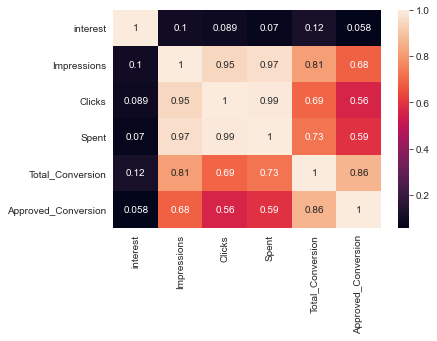

In [58]:
data_rel = data.iloc[:,3:]
sns.heatmap(data_rel.corr(), annot=True)

#### correlation between the relevant categorical features.
- 0  = Least correlated 
- 1  = Highly correlated - directly
- -1 = Highly correlated - Inversely

#### From the correlation matrix it is quite evident that

- The approved or total conversion rate is highly correlated and directly proportional to impressions.
- And, impressions feature is directly proportional to clicks received and Money spent on the ads.
- Thus, all the five features (Total or Approved Conversion rate, Impressions, Clicks, Money spent) are directly proportional to each other.

Text(0.5, 1.0, 'NUMBER OF ADS BY EACH CAMPAIGN')

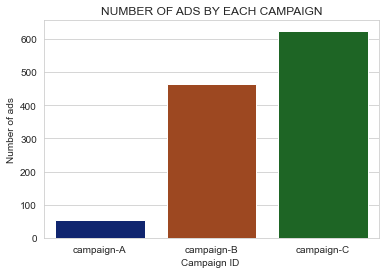

In [59]:
#Number of ads by each campaign.
sns.set_style('whitegrid')
sns.countplot(x='xyz_campaign_id', data=data, palette='dark')
plt.xlabel('Campaign ID ')
plt.ylabel('Number of ads')
plt.title('NUMBER OF ADS BY EACH CAMPAIGN')

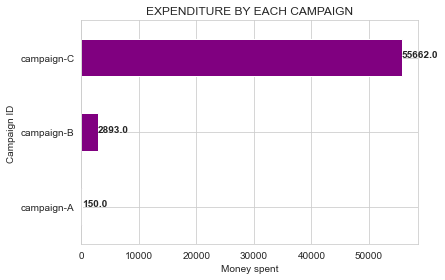

In [60]:
#calculating the total expenditure made by each campaign for advertising.
x=round(data.groupby('xyz_campaign_id').Spent.sum())
data.groupby('xyz_campaign_id').Spent.sum().plot(kind='barh', color='purple')
plt.title('EXPENDITURE BY EACH CAMPAIGN')
plt.ylabel('Campaign ID ')
plt.xlabel('Money spent')
plt.tight_layout()
for i, v in enumerate(x):
 plt.text(v , i , str(v), fontweight='bold')
plt.show()

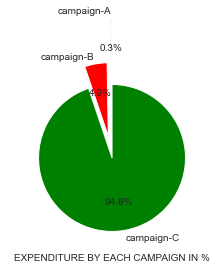

In [61]:
#plotting expenditure by each campaign in % of total
data.groupby('xyz_campaign_id').Spent.sum().plot(kind='pie', 
                                                 explode = (0.9,0.3,0), 
                                                 startangle=90,
                                                 autopct='%1.1f%%',
                                                 colors=('black','red','green'),
                                                 )
plt.xlabel('EXPENDITURE BY EACH CAMPAIGN IN %')
plt.ylabel('   ')
plt.tight_layout()
plt.show()

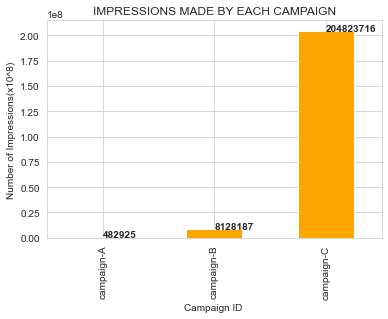

In [62]:
#Impressions made by  each campaign
I= data.groupby('xyz_campaign_id').Impressions.sum()
data.groupby('xyz_campaign_id').Impressions.sum().plot(kind='bar', color = 'orange')
plt.tight_layout
plt.xlabel("Campaign ID ")
plt.ylabel("Number of Impressions(x10^8)")
plt.title("IMPRESSIONS MADE BY EACH CAMPAIGN")
for i, v in enumerate(I):
 plt.text(i , v , str(v), fontweight='bold')
plt.show()

#### From the above 4 plots we can interpret that

- Of all, campaign-C spent the highest - 94% of total expenditure(which is 556662) for 600+ ads for 204823716 impressions.
- campaign-B spending 4.9% of total expenditure(which is 2893) for approx. 460 ads for 8128187 impressions.
- And, campaign-A spending the least - 0.3% of total expenditure(which is 150) for 50 ads approximately for 482925 impressions.

Text(0.5, 1.0, 'TARGET AUDIENCE FOR EACH CAMPAIGN BY GENDER')

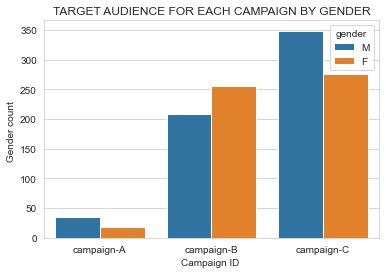

In [63]:
#Target audience for each campaign by gender.
sns.countplot(x='xyz_campaign_id', hue ='gender',data= data)
plt.xlabel("Campaign ID ")
plt.ylabel("Gender count ")
plt.title('TARGET AUDIENCE FOR EACH CAMPAIGN BY GENDER')

- Suprisignly , unlike campaign A and C , campaign-B chose to target more females than males.

#### Checking the different age categories and replacing age range with MEAN age range.
- '30-34' to 32
- '35-39' to 37 
- '40-44' to 42 
- '45-49' to 47

In [64]:
print(data['age'].unique())
data["age"].replace( {'30-34': 32 , '35-39': 37 , '40-44' : 42, '45-49' : 47 }, inplace=True)
print('                 to           ')
print(data['age'].unique())

['30-34' '35-39' '40-44' '45-49']
                 to           
[32 37 42 47]


Text(0.5, 1.0, 'TARGET AUDIENCE FOR EACH CAMPAIGN BY AGE')

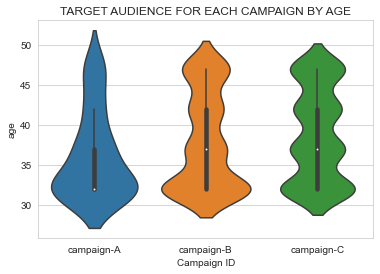

In [65]:
#Target audience for each campaign by age.
sns.violinplot(x='xyz_campaign_id', y='age', data=data )
plt.xlabel("Campaign ID")
plt.title('TARGET AUDIENCE FOR EACH CAMPAIGN BY AGE')

- Target audience for campaign-A and campaign-B were mostly poeple of age group 32-34 and campaing-C targeted all the age groups equally with significance given to age group 30-34.

Text(0.5, 1.0, 'TARGET AUDIENCE FOR EACH CAMPAIGN BY AGE AND GENDER')

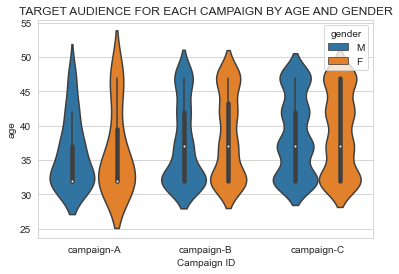

In [66]:
#Target audience for each campaign by age group including gender.    
sns.violinplot(x='xyz_campaign_id', y='age', data=data, hue='gender' )
plt.xlabel("Campaign ID")
plt.title('TARGET AUDIENCE FOR EACH CAMPAIGN BY AGE AND GENDER')

- campaign-A apart from 30-34 years category, they focused more on females of age group 45-49 compared to males of same age group and focused more on males of age group 40-44 comapred to females of same age group.
- campaign-B and C focused males and females equally for all the age groups.

Text(0.5, 1.0, 'TARGET AUDIENCE WITH RESPECTIVE TO THERE INTERESTS')

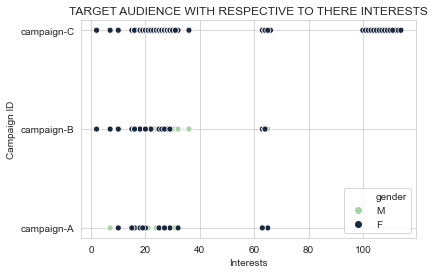

In [67]:
#Target audience with respective to there interests.
sns.scatterplot(x='interest', y='xyz_campaign_id', data=data, hue='gender',palette="ch:r=-.5,l=.75")
plt.ylabel("Campaign ID")
plt.xlabel("Interests")
plt.title('TARGET AUDIENCE WITH RESPECTIVE TO THERE INTERESTS')

- Target audience for campaign-A, B and C were mainly people of interest codes between 10 and 40.
But , aditionally campaign-C targetted  people with interest codes 100 and above, and 
campaign-B with interst codes between 60-70.

Text(0.5, 1.0, 'TARGET AUDIENCE WITH RESPECTIVE TO THERE INTERESTS AND AGE GROUPS')

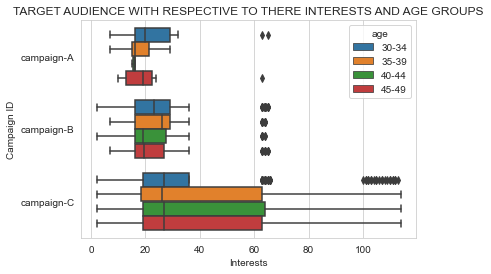

In [68]:
#Target audience with respective to there interests and age groups.
sns.boxplot(x='interest', y='xyz_campaign_id', data=data, hue= data_main['age'])
plt.ylabel("Campaign ID")
plt.xlabel("Interests")
plt.title('TARGET AUDIENCE WITH RESPECTIVE TO THERE INTERESTS AND AGE GROUPS')

- campaign-A focused on people with interest codes between 15 to 20 for all the age groups.
- campaign-B focused more on poeple with interest codes above 20 for age groups 30-39 and interest codes below 20 for age groups 40-49.
- campaign-C focused on people with interest codes between 20 to 25 for all the age groups. Aditionally targetted people with 100 and above interest codes for 30-34 age group.

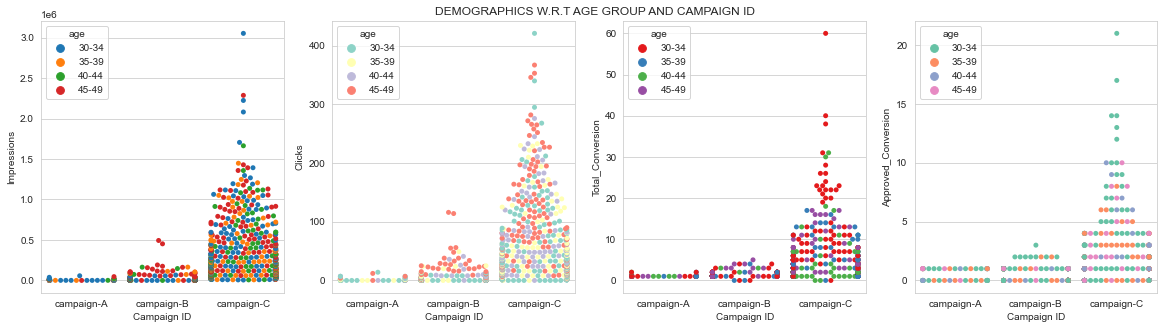

In [69]:
fig , ax = plt.subplots(1,4,figsize= (20,5))
sns.swarmplot(x='xyz_campaign_id',y='Impressions', data=data,hue=data_main['age'], ax= ax[0])
ax[0].set_xlabel("Campaign ID")

sns.swarmplot(x='xyz_campaign_id',y='Clicks', data=data, palette="Set3", hue=data_main['age'],ax= ax[1] )
ax[1].set_xlabel("Campaign ID")

sns.swarmplot(x='xyz_campaign_id',y='Total_Conversion', data=data, palette="Set1",hue=data_main['age'], ax=ax[2] )
ax[2].set_xlabel("Campaign ID")

sns.swarmplot(x='xyz_campaign_id',y='Approved_Conversion', data=data, palette="Set2",hue=data_main['age'],ax= ax[3] )
ax[3].set_xlabel("Campaign ID")

ax[2].title.set_text('DEMOGRAPHICS W.R.T AGE GROUP AND CAMPAIGN ID                                                                                         ')

#### Observing at the plots from left to right,
- even though people of all the age groups viewed the published ads by the campaigns, 30-34 age group has the highest Total or Approved Conversion rate.
- Incase of click through rates by age, all the age groups have viewed the ads equally.

Text(0.5, 1.0, 'ADS PUBLISHED BY EACH CAMPAIGN BASED ON INTERESTS')

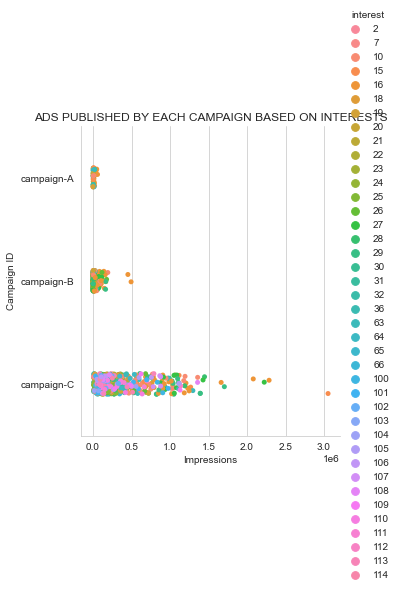

In [70]:
sns.catplot(y='xyz_campaign_id',x='Impressions', data=data,hue='interest')
plt.ylabel("Campaign ID")
plt.title('ADS PUBLISHED BY EACH CAMPAIGN BASED ON INTERESTS')

Text(0.5, 1.0, 'VIEWS RECIEVED FOR ADS PUBLISHED BY EACH CAMPAIGN BASED ON INTERESTS')

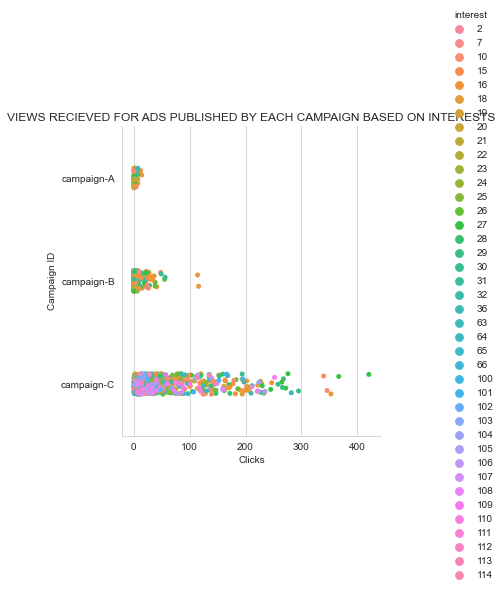

In [71]:
sns.catplot(y='xyz_campaign_id',x='Clicks', data=data, hue='interest' )
plt.ylabel("Campaign ID")
plt.title('VIEWS RECIEVED FOR ADS PUBLISHED BY EACH CAMPAIGN BASED ON INTERESTS')

Text(0.5, 1.0, 'TOTAL CONVERSIONS BY EACH CAMPAIGN BASED ON INTERESTS')

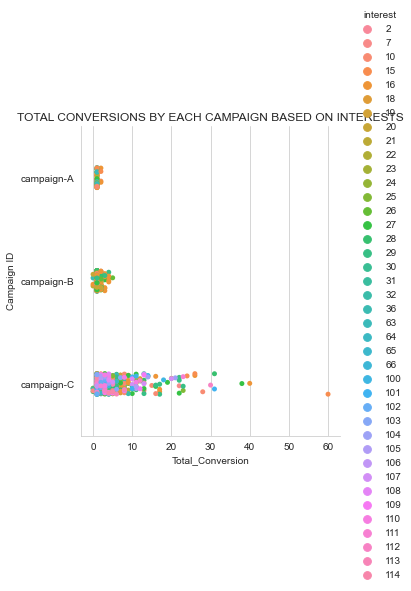

In [72]:
sns.catplot(y='xyz_campaign_id',x='Total_Conversion', data=data,hue='interest')
plt.ylabel("Campaign ID")
plt.title('TOTAL CONVERSIONS BY EACH CAMPAIGN BASED ON INTERESTS')

Text(0.5, 1.0, 'APPROVED CONVERSIONS BY EACH CAMPAIGN BASED ON INTERESTS')

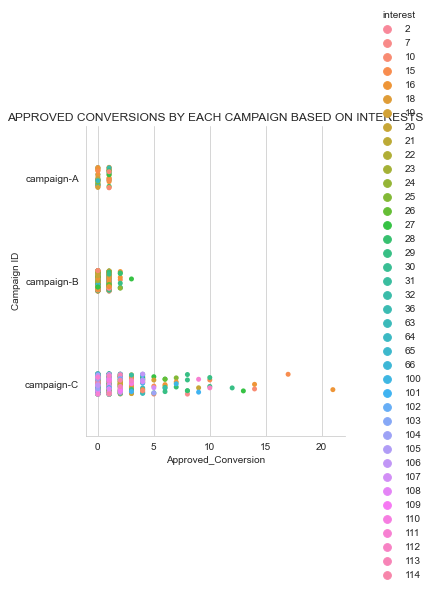

In [73]:
sns.catplot(y='xyz_campaign_id',x='Approved_Conversion', data=data,hue='interest')
plt.ylabel("Campaign ID")
plt.title('APPROVED CONVERSIONS BY EACH CAMPAIGN BASED ON INTERESTS')

#### Looking at the above 4 plots,
-  Comparing the ADS shown to different Interest groups with clicks and conversions, The majority of the clicks received and product brought were from the people who have interest codes between 15-30.

In [76]:
#Interest codes vs Impressions.
print(data.groupby('interest').Impressions.sum())

interest
2       1727646
7       2612839
10     17989844
15     10745856
16     31809524
18      8646488
19      6083217
20      6899907
21      2833321
22      3965401
23      1836368
24      2256874
25      5251719
26      4868639
27     16352527
28     10959830
29     18768653
30      2190783
31      1075312
32      6455261
36       922928
63      8365640
64      5085460
65      1737547
66       893407
100     2023690
101     2960453
102     1160953
103     1921053
104     1412110
105     2656351
106     1592431
107     4482111
108     2763404
109     2980365
110     2434719
111     1490896
112     2324572
113     1830565
114     1066164
Name: Impressions, dtype: int64


#### From the above figures we can observe, the impressions made by the campaings for interest codes above 100 are huge in number, compared to iterest codes between 15-30 and graphs proved the conversion rate for 100+ interest codes are very low. Thus these people are not to be aimed for better sales.

## calculating the conversion rates

In [95]:
print('Total number of impressions by each campaign.')
print('')
print(I)
print('')
print('')
C = data.groupby('xyz_campaign_id').Clicks.sum()
print('Total number of clicks on for that ad for each campaign.')
print('')
print(C)
print('')
print('')
TC = data.groupby('xyz_campaign_id').Total_Conversion.sum()
print('Total number of people who enquired about the product after seeing the ad for each campaign.')
print('')
print(TC)
print('')
print('')
AC = data.groupby('xyz_campaign_id').Approved_Conversion.sum()
print('Total number of people who bought the product after seeing the ad for each campaign.')
print('')
print(AC)
print('')
print('')
for i in range(len(I)):
    if i == 0:
     Imp_campaignA = I[i]
    elif i == 1:
     Imp_campaignB = I[i]
    else:
     Imp_campaignC = I[i]

for i in range(len(C)):
    if i == 0:
     Clicks_campaignA = C[i]
    elif i == 1:
     Clicks_campaignB = C[i]
    else:
     Clicks_campaignC = C[i]

for i in range(len(TC)):
    if i == 0:
     TC_campaignA = TC[i]
    elif i == 1:
     TC_campaignB = TC[i]
    else:
     TC_campaignC = TC[i]

for i in range(len(AC)):
    if i == 0:
     AC_campaignA = AC[i]
    elif i == 1:
     AC_campaignB = AC[i]
    else:
     AC_campaignC = AC[i]

#Clicks to Impressions % by each Campaign
print('')
print('')
print('Click through rate by Campaign-A '+str((Clicks_campaignA/Imp_campaignA)*100)+ '%') 
print('')
print('Click through rate by Campaign-B '+str((Clicks_campaignB/Imp_campaignB)*100)+ '%') 
print('')
print('Click through rate by Campaign-C '+str((Clicks_campaignC/Imp_campaignC)*100)+ '%') 


# Total Convertion to Clicks % by each Campaign
print('')
print('')
print('Total Convertion rate % by Campaign-A '+str((TC_campaignA/Clicks_campaignA)*100)+ '%') 
print('')
print('Total Convertion rate % by Campaign-B '+str((TC_campaignB/Clicks_campaignB)*100)+ '%') 
print('')
print('Total Convertion rate % by Campaign-C '+str((TC_campaignC/Clicks_campaignC)*100)+ '%') 


#Approved Conversion to Total Convertion  % by each Campaign
print('')
print('')
print('Approved Conversion rate % by Campaign-A '+str((AC_campaignA/TC_campaignA)*100)+ '%') 
print('')
print('Approved Conversion rate % by Campaign-B '+str((AC_campaignB/TC_campaignB)*100)+ '%') 
print('')
print('Approved Conversion rate % by Campaign-C '+str((AC_campaignC/TC_campaignC)*100)+ '%') 

Total number of impressions by each campaign.

xyz_campaign_id
campaign-A       482925
campaign-B      8128187
campaign-C    204823716
Name: Impressions, dtype: int64


Total number of clicks on for that ad for each campaign.

xyz_campaign_id
campaign-A      113
campaign-B     1984
campaign-C    36068
Name: Clicks, dtype: int64


Total number of people who enquired about the product after seeing the ad for each campaign.

xyz_campaign_id
campaign-A      58
campaign-B     537
campaign-C    2669
Name: Total_Conversion, dtype: int64


Total number of people who bought the product after seeing the ad for each campaign.

xyz_campaign_id
campaign-A     24
campaign-B    183
campaign-C    872
Name: Approved_Conversion, dtype: int64




Click through rate by Campaign-A 0.023399078531863127%

Click through rate by Campaign-B 0.024408887246319507%

Click through rate by Campaign-C 0.017609288955581687%


Total Convertion rate % by Campaign-A 51.32743362831859%

Total Convertion rate % by Campaign

#### Looking at the Conversion percentages campaign-A has done an excellent job compared to campaign-B and campaign-C.

***************************************************************************************************************************************

### Business Questions !!!

#### 1.How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios).
- In order to optimize the social ad campaigns for best results in terms of conversion rates or click through rates ,it is best if we target the population(either male or female) with interest codes 15-30 of age group 30-34. In addition to this, as we know impressions, spent, clicks and conversions are directly proportional, showing ads only to this category of people will save us money as the conversion rate is high for them.

#### 2.Finding the perfect target demographics with the appropriate clickthrough rates.
- age group : 30-34
- Interest code : 15-30
- Money needed to spend for these demographics will be less to achieve more clicks.

#### 3.Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns.
-  Ideal turnaround/decision making time per age group cannot be predicted as there no feature present in the data set related to it. Ex:- date, time, etc.

#### 4.Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.
- Campaign-A(916)

## MACHINE LEARNING QUESTION - 1 (ML1)
### How would you handle an imbalanced dataset?

Imbalanced data are dangerous while evaluating performance metrics. Thus this issue can be solved by few sampling techniques.The library used for balancing the data set are Imblearn.

1.Over or Up sampling.
This technique tries to balance dataset by increasing the size of rare samples, rather than getting rid of abundant samples. new rare samples are generated. Few up sampling techniques are SMOTETOmek, SMOTE, RandomOverSampler.

2.Under or Down sampling.
This technique balances the dataset by reducing the size of the abundant class. This method is used when sufficient amount of data points are present. Few down sampling techniques are NearMiss, etc.